# Lecture 1 Geometry of Linear Algebra

## Systems of Linear Equations

Is list of linear equations. i.e.  
<span class="math-inline">2x \+ y \= 3</span>  
<span class="math-inline">x \- 2y \= \-1</span>

## Use of `SymPy` to solve the above system of equations

If you haven't install SymPy library yet please run command
`pip install sympy` or if you use conda package manager then run
`conda install sympy -y` should install the library.

In [10]:
# pip:
# %pip install sympy
# conda
# %conda install sympy -y

In [4]:
import matplotlib.pyplot as plt
import sympy as syp

In [7]:
help(syp.Symbol)

Help on class Symbol in module sympy.core.symbol:

class Symbol(sympy.core.expr.AtomicExpr, sympy.logic.boolalg.Boolean)
 |  Symbol(name, **assumptions)
 |
 |  Symbol class is used to create symbolic variables.
 |
 |  Explanation
 |  ===========
 |
 |  Symbolic variables are placeholders for mathematical symbols that can represent numbers, constants, or any other mathematical entities and can be used in mathematical expressions and to perform symbolic computations.
 |
 |  Assumptions:
 |
 |  commutative = True
 |  positive = True
 |  real = True
 |  imaginary = True
 |  complex = True
 |  complete list of more assumptions- :ref:`predicates`
 |
 |  You can override the default assumptions in the constructor.
 |
 |  Examples
 |  ========
 |
 |  >>> from sympy import Symbol
 |  >>> x = Symbol("x", positive=True)
 |  >>> x.is_positive
 |  True
 |  >>> x.is_negative
 |  False
 |
 |  passing in greek letters:
 |
 |  >>> from sympy import Symbol
 |  >>> alpha = Symbol('alpha')
 |  >>> alpha #

In [6]:
x, y = syp.Symbol('x'), syp.Symbol('y')
type(x), type(y)

(sympy.core.symbol.Symbol, sympy.core.symbol.Symbol)

In [9]:
help(syp.Eq)

Help on class Equality in module sympy.core.relational:

class Equality(Relational)
 |  Equality(lhs, rhs, **options)
 |
 |  An equal relation between two objects.
 |
 |  Explanation
 |  ===========
 |
 |  Represents that two objects are equal.  If they can be easily shown
 |  to be definitively equal (or unequal), this will reduce to True (or
 |  False).  Otherwise, the relation is maintained as an unevaluated
 |  Equality object.  Use the ``simplify`` function on this object for
 |  more nontrivial evaluation of the equality relation.
 |
 |  As usual, the keyword argument ``evaluate=False`` can be used to
 |  prevent any evaluation.
 |
 |  Examples
 |  ========
 |
 |  >>> from sympy import Eq, simplify, exp, cos
 |  >>> from sympy.abc import x, y
 |  >>> Eq(y, x + x**2)
 |  Eq(y, x**2 + x)
 |  >>> Eq(2, 5)
 |  False
 |  >>> Eq(2, 5, evaluate=False)
 |  Eq(2, 5)
 |  >>> _.doit()
 |  False
 |  >>> Eq(exp(x), exp(x).rewrite(cos))
 |  Eq(exp(x), sinh(x) + cosh(x))
 |  >>> simplify(_)
 | 

In [8]:
eq1 = syp.Eq(2*x + y, 3)
eq2 = syp.Eq(x - 2*y, -1)
type(eq1), type(eq2)

(sympy.core.relational.Equality, sympy.core.relational.Equality)

## Solve the systems of equations using Solver

In [12]:
help(syp.solvers.solve)

Help on function solve in module sympy.solvers.solvers:

solve(f, *symbols, **flags)
    Algebraically solves equations and systems of equations.

    Explanation

    Currently supported:
        - polynomial
        - transcendental
        - piecewise combinations of the above
        - systems of linear and polynomial equations
        - systems containing relational expressions
        - systems implied by undetermined coefficients

    Examples

    The default output varies according to the input and might
    be a list (possibly empty), a dictionary, a list of
    dictionaries or tuples, or an expression involving relationals.
    For specifics regarding different forms of output that may appear, see :ref:`solve_output`.
    Let it suffice here to say that to obtain a uniform output from
    `solve` use ``dict=True`` or ``set=True`` (see below).

        >>> from sympy import solve, Poly, Eq, Matrix, Symbol
        >>> from sympy.abc import x, y, z, a, b

    The expressions th

In [16]:
solution = syp.solvers.solve([eq1, eq2], (x, y))
print(f"x = {solution[x]}, y = {solution[y]}")

x = 1, y = 1


This is probably things that you have done in high school.    
But let's visualize system of linear equations in several useful ways.

## Row Picture (Graphical Representation)

We have list of linear equations
let's plot those equations in cartesian plane.

In [21]:
help(plot_implicit)

Help on function plot_implicit in module sympy.plotting.plot_implicit:

plot_implicit(expr, x_var=None, y_var=None, adaptive=True, depth=0, n=300, line_color='blue', show=True, **kwargs)
    A plot function to plot implicit equations / inequalities.

    Arguments

    - expr : The equation / inequality that is to be plotted.
    - x_var (optional) : symbol to plot on x-axis or tuple giving symbol
      and range as ``(symbol, xmin, xmax)``
    - y_var (optional) : symbol to plot on y-axis or tuple giving symbol
      and range as ``(symbol, ymin, ymax)``

    If neither ``x_var`` nor ``y_var`` are given then the free symbols in the
    expression will be assigned in the order they are sorted.

    The following keyword arguments can also be used:

    - ``adaptive`` Boolean. The default value is set to True. It has to be
        set to False if you want to use a mesh grid.

    - ``depth`` integer. The depth of recursion for adaptive mesh grid.
        Default value is 0. Takes value 

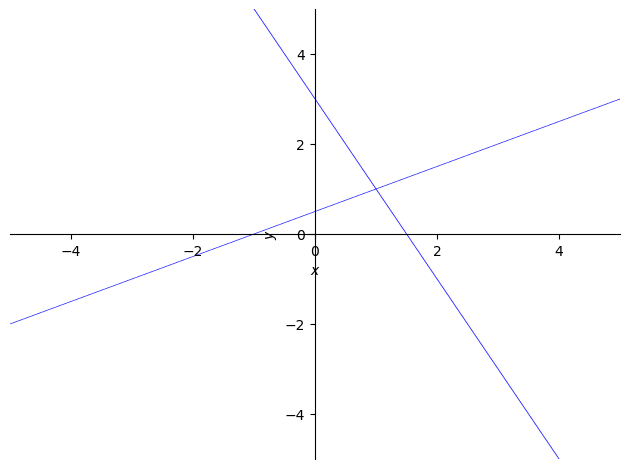

In [24]:
from sympy import plot_implicit
plot_eq1 = plot_implicit(eq1, show=False)
plot_eq2 = plot_implicit(eq2, show=False)

plot_eq1.extend(plot_eq2)
plot_eq1.show()

Easy peasy, just plot the lines.

## Column Pictures (Vector Representation)

Now if we rewrite the equations in matrix form.

$$
\begin{bmatrix}
2 & 1 \\
1 & -2 
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
3 \\
-1
\end{bmatrix}
$$

We can also represent the system using column vectors like this:

$$
x\begin{bmatrix}
2 \\
1
\end{bmatrix}
+
y\begin{bmatrix}
1 \\
-2
\end{bmatrix}
=
\begin{bmatrix}
3 \\
-1
\end{bmatrix}
$$

## Representing the System as Ax = b

We can concisely express the system of linear equations in the matrix form **Ax = b**, where:

*   **A** is the *coefficient matrix*:
    $$
    A = \begin{bmatrix}
    2 & 1 \\
    1 & -2 
    \end{bmatrix}
    $$

*   **x** is the *vector of unknowns*:
    $$
    x = \begin{bmatrix}
    x \\
    y
    \end{bmatrix}
    $$

*   **b** is the *constant vector* (or *result vector*):
    $$
    b = \begin{bmatrix}
    3 \\
    -1
    \end{bmatrix}
    $$

Thus, our system of equations is equivalent to:

$$
\begin{bmatrix}
2 & 1 \\
1 & -2 
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
3 \\
-1
\end{bmatrix}
$$

Which is in the form **Ax = b**. This representation is fundamental in linear algebra as it allows us to use powerful matrix operations to solve systems of equations.

In [26]:
# numpy is most popular linear algebra library in Python ecosystem
import numpy as np 
# write Ax = b in matrix form
col1 = np.array([2, 1])
col2 = np.array([1, -2])
b = np.array([3, -1])
A = np.column_stack((col1, col2))

In [30]:
A

array([[ 2,  1],
       [ 1, -2]])

In [31]:
b

array([ 3, -1])

In numpy you can use `np.linalg.solve` to solve the system of equations.

In [32]:
x = np.linalg.solve(A, b)
x

array([1., 1.])

In [39]:
help(plt.arrow)

Help on function arrow in module matplotlib.pyplot:

arrow(x: 'float', y: 'float', dx: 'float', dy: 'float', **kwargs) -> 'FancyArrow'
    Add an arrow to the Axes.

    This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.

    Parameters
    ----------
    x, y : float
        The x and y coordinates of the arrow base.

    dx, dy : float
        The length of the arrow along x and y direction.

    width : float, default: 0.001
        Width of full arrow tail.

    length_includes_head : bool, default: False
        True if head is to be counted in calculating the length.

    head_width : float or None, default: 3*width
        Total width of the full arrow head.

    head_length : float or None, default: 1.5*head_width
        Length of arrow head.

    shape : {'full', 'left', 'right'}, default: 'full'
        Draw the left-half, right-half, or full arrow.

    overhang : float, default: 0
        Fraction that the arrow is swept back (0 overhang means
        triangular shap

But that's not the main point here.   
Let's visualize the system of equations as column vectors representation.

/var/folders/tc/5nkzd61n29s6sv95pcw358g00000gn/T/ipykernel_55167/1500341335.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


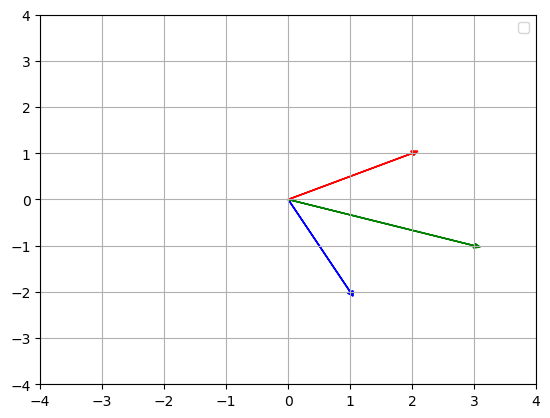

In [38]:
# inferred arrow1, arrow2 from vector col1, col2
arrow1 = plt.arrow(0, 0, col1[0], col1[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
arrow2 = plt.arrow(0, 0, col2[0], col2[1], head_width=0.1, head_length=0.1, fc='b', ec='b')
# target vector that we want to reach
target_arrow = plt.arrow(0, 0, b[0], b[1], head_width=0.1, head_length=0.1, fc='g', ec='g')

# plot the arrows
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.gca().add_patch(arrow1)
plt.gca().add_patch(arrow2)
plt.gca().add_patch(target_arrow)
plt.legend()
plt.show()